In [1]:
from matplotlib import pyplot
%matplotlib notebook
from astropy.io import fits
import numpy


In [2]:
from soapy import atmosphere, WFS, confParse
from aotools import circle

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


In [3]:
SOAPY_CONF = "conf/test_conf.py"

In [46]:
# Initialise the WFS
config = confParse.Configurator(SOAPY_CONF)
config.loadSimParams()

config.tel.telDiam=1.
config.wfss[0].wavelength = 500e-9
config.atmos.scrnNo = 1

config.calcParams()

mask = circle.circle(config.sim.pupilSize/2., config.sim.simSize)

wfs = WFS.ShackHartmann(
        config.sim, config.wfss[0], config.atmos, config.lgss[0], mask)

In [37]:
R0s = numpy.linspace(0.05, 1, 5)
N_ITERS = 500

In [38]:
# First, lets make lots of phase screens
scrns = numpy.zeros((len(R0s), N_ITERS, config.sim.scrnSize, config.sim.scrnSize))
for ir0, r0 in enumerate(R0s):
    print('Make screens with r0:{}'.format(r0))
    config.atmos.r0 = r0
    atmos = atmosphere.atmos(config.sim, config.atmos)
    for i in range(N_ITERS):
        scrn = atmos.moveScrns()
        scrns[ir0, i] = atmos.moveScrns()[0]
    

SyntaxError: invalid syntax (<ipython-input-38-c0f2dfefee89>, line 4)

<IPython.core.display.Javascript object>


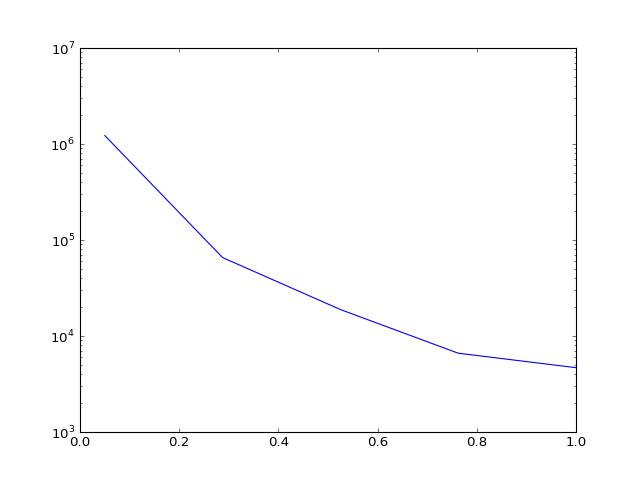

In [47]:
pyplot.figure()
pyplot.semilogy(R0s, scrns.var(1).mean((1,2)))

In [48]:
wfsScrns = numpy.zeros((len(R0s), N_ITERS, wfs.EField.shape[0], wfs.EField.shape[1])).astype('complex64')
for ir0, r0 in enumerate(R0s):
    print('r0: {}'.format(r0))
    for i in range(N_ITERS):
        wfs.frame(scrns[ir0, i], read=False)
        wfsScrns[ir0, i] = wfs.EField

r0: 0.05
r0: 0.2875
r0: 0.525
r0: 0.7625
r0: 1.0


In [49]:
pyplot.figure()
# pyplot.semilogy(R0s, scrns.var(1).mean((1,2)), label='Atmosphere Screens')
pyplot.semilogy(R0s, numpy.angle(wfsScrns).var(1).mean((1,2)), label='WFS Screens')
pyplot.legend()

<IPython.core.display.Javascript object>

In [50]:
numpy.allclose(scrns[0,0], numpy.angle(numpy.exp(1j*scrns[0,0])))

False

<IPython.core.display.Javascript object>


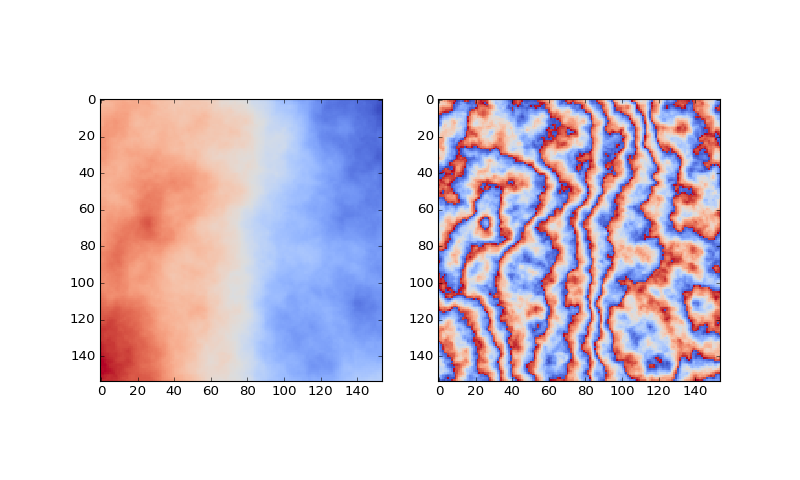

In [55]:
scrn = scrns[0,0] * 2*numpy.pi/500

pyplot.figure(figsize=(10, 6))
pyplot.subplot(1,2,1)
pyplot.imshow(scrn)
pyplot.subplot(1,2,2)
pyplot.imshow(numpy.angle(numpy.exp(1j*scrn)))

<IPython.core.display.Javascript object>


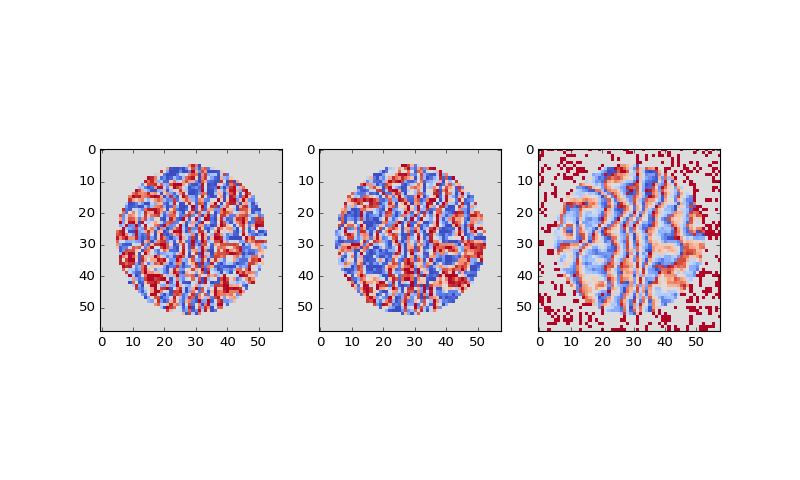

In [56]:
scrn = wfsScrns[0,0]

pyplot.figure(figsize=(10, 6))
pyplot.subplot(1,3,1)
pyplot.imshow(scrn.real)
pyplot.subplot(1,3,2)
pyplot.imshow(scrn.imag)
pyplot.subplot(1,3,3)
pyplot.imshow(numpy.angle(scrn))

<IPython.core.display.Javascript object>


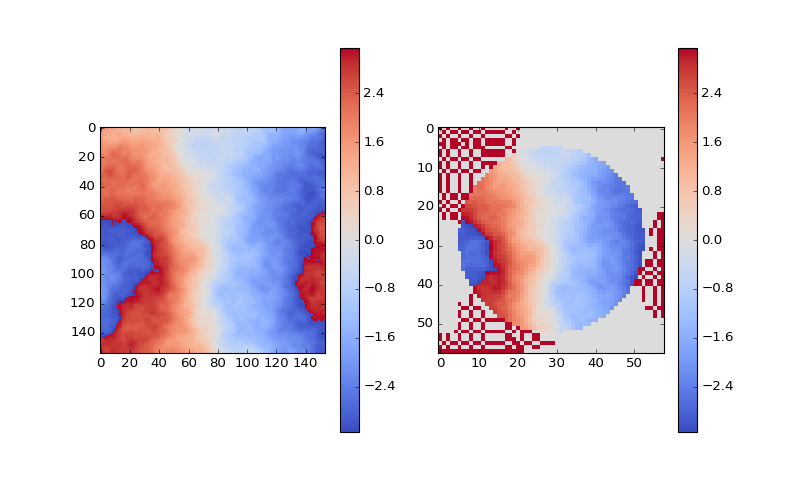

In [58]:
pyplot.figure(figsize=(10, 6))
pyplot.subplot(1,2,1)
pyplot.imshow(numpy.angle(numpy.exp(1j*scrns[3,0]*2*numpy.pi/500)))
pyplot.colorbar()
pyplot.subplot(1,2,2)
pyplot.imshow(numpy.angle(wfsScrns[3,0]))
pyplot.colorbar()

In [54]:
numpy.allclose(numpy.angle(numpy.exp(1j*scrns[0,0]*2*numpy.pi/500)), numpy.angle(wfsScrns[0,0]))

ValueError: operands could not be broadcast together with shapes (154,154) (58,58) 

In [ ]:
scrnsAngle = numpy.angle(numpy.exp(1j*scrns*2*numpy.pi/500))
wfsScrnsAngle = numpy.angle(wfsScrns)

In [ ]:
pyplot.figure()
pyplot.imshow(wfsScrnsAngle[4,0])
pyplot.colorbar()

In [ ]:
pyplot.figure()
pyplot.imshow((scrnsAngle - wfsScrnsAngle)[4,0])
pyplot.colorbar()

In [59]:
phs = scrns[0,0][:20,:20]

<IPython.core.display.Javascript object>


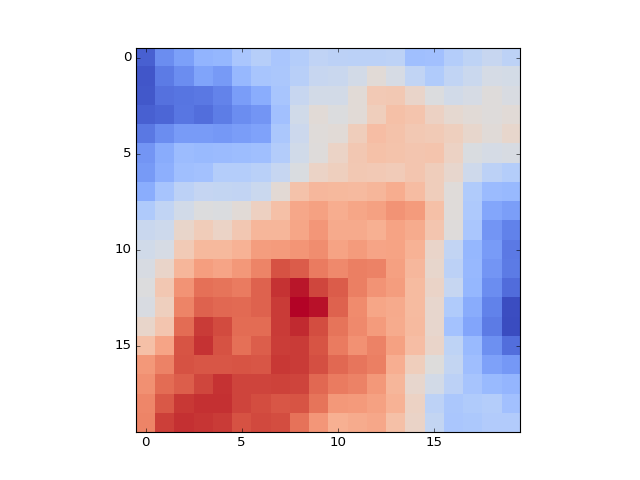

In [60]:
pyplot.figure()
pyplot.imshow(phs)

<IPython.core.display.Javascript object>


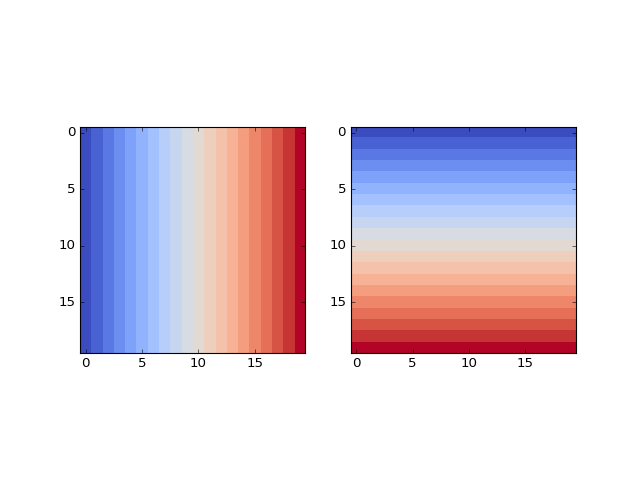

In [65]:
coords = numpy.linspace(-1,1,20)
x, y = numpy.meshgrid(coords, coords)
pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(x)
pyplot.subplot(1,2,2)
pyplot.imshow(y)

In [82]:
xGrad = (phs-phs.mean()).dot(x).sum()
yGrad = (phs-phs.mean()).dot(y).sum()
print(xGrad, yGrad)

(9.0949470177292824e-13, -126636.18012987383)


In [73]:
((phs-phs.mean())*(xGrad)).sum()

-2.541098841762901e-20

In [72]:
((phs-phs.mean())*(yGrad)).sum()

-5.7220458984375e-06

In [79]:
scrns1 = scrns[0]
scrns1.shape
scrns1[:] = (scrns1[:].T - scrns1.mean((1,2))).T

In [81]:
scrns1.mean((1,2))

array([  1.96349000e-14,  -1.71805375e-14,   1.47261750e-14,
        -1.47261750e-14,  -9.81744998e-15,   1.96349000e-14,
         4.90872499e-14,  -3.92697999e-14,   0.00000000e+00,
        -1.96349000e-14,   0.00000000e+00,  -3.92697999e-14,
        -3.92697999e-14,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   3.92697999e-14,   3.92697999e-14,
        -3.92697999e-14,   0.00000000e+00,   3.92697999e-14,
        -7.85395998e-14,  -3.92697999e-14,   3.92697999e-14,
         0.00000000e+00,  -7.85395998e-14,   7.85395998e-14,
        -3.92697999e-14,   0.00000000e+00,   7.85395998e-14,
         3.92697999e-14,   3.92697999e-14,   0.00000000e+00,
         7.85395998e-14,   0.00000000e+00,   0.00000000e+00,
        -3.92697999e-14,   1.96349000e-14,  -1.96349000e-14,
        -4.90872499e-14,  -3.92697999e-14,   6.13590624e-16,
        -4.04969812e-14,   2.20892624e-14,   4.90872499e-15,
        -2.45436249e-15,   0.00000000e+00,  -1.22718125e-14,
         0.00000000e+00,

In [ ]:
wfs = WFS.Gradient()